# `self` x `cls`
- Usamos **`self`** quando queremos falar com o **exemplo (instância)**
- Usamos **`cls`** quando queremos falar com a **classe**

In [11]:
class Fila:
    c_fila = [] #c de class

    @classmethod
    def c_entrar(cls, obj):
        cls.c_fila.append(obj)
        print(cls.c_fila)

- `c_fila` é um atributo da classe.
- Ela será mantida dentro de todas as instâncias, ou seja, vai ser comum a todos os objetos. 

In [18]:
class Fila:
    c_fila = []

    @classmethod
    def c_entrar(cls, obj):
        cls.c_fila.append(obj)

    def __init__(self):
        self.s_fila = []

    def s_entrar(self, nome):
        self.s_fila.append(nome)

Fila.c_entrar("Ezequiel")
Fila.c_entrar("Malaquias")

supermercado = Fila()
supermercado.c_fila


['Ezequiel', 'Malaquias']

# Tipos de Métodos
- **Métodos de instância**
    - Só funcionam com a classe instanciada
    - Manipulam atributos da instância
- **Métodos de classe**
    - Funcionam a todo momento, até mesmo na instância
    - Manipulam atributos de classes
    - Devem usar **`@classmethod`**
    
- **Métodos estáticos**
    - Funcionam a todo momento
    - Não interagem com atributos
    - - Devem usar **`@staticmethod`**
- **Métodos Abstratos**

---

## Vamos pensar em pizza
- Toda pizza (comum) tem 8 pedaços. Ou seja, isso é indiferente, independente de qual o exemplo/instância de uma pizza específica. Logo, isso pode ser um atributo de classe.
- Já a quantidade de pedaços disponíveis são referentes a nossa instância, pois da pizza "real' nós podemos pegar pedaços.

In [41]:
class Pizza():
    pedacos = 8

    def __init__(self, sabor):
        self.sabor = sabor

    def pegar_pedaco(self):
        self.pedacos -= 1

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

    @staticmethod
    def ingredientes():
        return "Molho de tomate, queijo, cebola"
        
 
pc = Pizza("Calabresa")
pf = Pizza("Frango")

pc.pegar_pedaco()
pc.pegar_pedaco()

print(pf.pedacos)
print(pc.pedacos)

Pizza.mudar_tamanho(12)
print(Pizza.pedacos)

mus = Pizza("Muçarela")
mus.pedacos
mus.pegar_pedaco()
print(mus.pedacos)
print(Pizza.pedacos)

Pizza.ingredientes()

mus.mudar_tamanho(16)
Pizza.pedacos

8
6
12
11
12


16

- Diferente do exemplo da fila (que usava uma lista, que é mutável, com método append, tinhamos uma alteração diretamente no objeto da classe, refletindo aquela alteração para todas as instâncias. Por isso a mesma fila foi gerada para todas as instâncias.

- Aqui, não existe um atributo de instância chamado 'pedacos', então ao executar `self.pedacos -= 1`, o interpretador procura pedacos na instância, não encontra, e então passa a procurar na classe. Ao encontrar, ele pega o valor, subtrai (8 - 1 = 7) e então cria implicitamente um atributo `pedacos` na instância e atribui o valor 7 a ele.

---

# O que é o `staticmethod`?
- Se comporta como uma função normal, mas que vive dentro do escopo da classe sem interagir com nada dela.
- EStá logicamente relacionada auma calsse, mas não depende de nenhum estado (atributo) da classe ou da instância. 

In [33]:
class Calculadora:
    def __init__(self, marca):
        self.marca = marca

    # Este é um método de instância
    def somar(self, a, b):
        return a + b

    # Este é um método estático
    @staticmethod
    def eh_par(numero):
        # Note que este método não usa 'self' nem 'cls'.
        # Ele só precisa do argumento 'numero' para funcionar.
        # A lógica de "ser par" não depende de uma calculadora específica.
        return numero % 2 == 0

# --- Como usar ---

# Para usar o método de instância, eu PRECISO de um objeto
casio = Calculadora("Casio")
resultado = casio.somar(5, 3) # Preciso de 'casio' para chamar o método
print(f"Resultado da soma: {resultado}")

# Para usar o método estático, eu NÃO PRECISO de um objeto.
# Posso chamá-lo diretamente na classe.
print(f"O número 10 é par? {Calculadora.eh_par(10)}")
print(f"O número 7 é par? {Calculadora.eh_par(7)}")

# Também é possível chamar o método estático a partir da instância,
# mas isso é menos comum. O comportamento é o mesmo.
print(f"O número 10 é par (chamado pela instância)? {casio.eh_par(10)}")

A calculadora Casio está somando...
Resultado da soma: 8
O número 10 é par? True
O número 7 é par? False
O número 10 é par (chamado pela instância)? True


---
# Herança
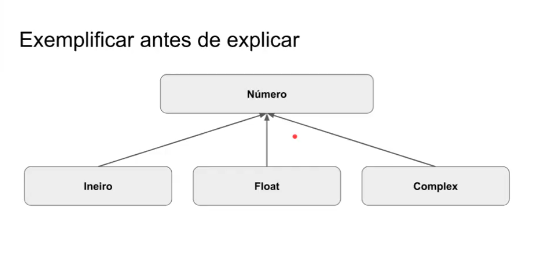

## Superclass e Subclass
- A Subclass herda da SuperClass
- Podemos ter várias Subclasses herdando da mesma SUperClass

### Subclass
- Classe que pega as coisas de outra, traz para si e modifica determinados comportamentos

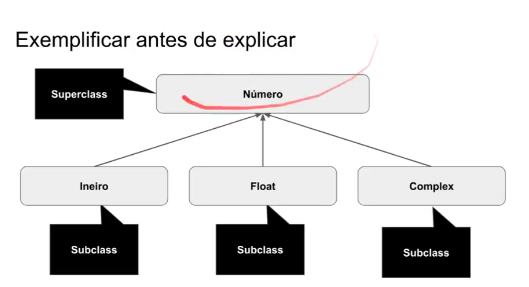

## Verificando subclasses
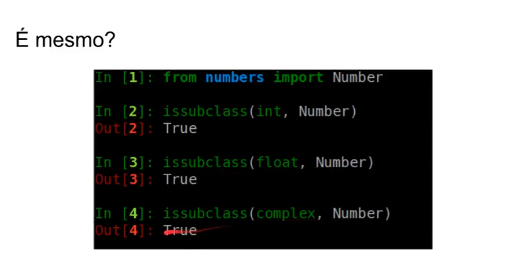

- Segundo Sebesta, herança é uma concepção para resolver dois problemas:
1. O reuso de tipos abstratos de dados
    - Os tipos abstratos de dados eram definidos para resolver problemas específicos, mas depois perdiam o seu uso.
2. Todos os tipos têm a mesma hierarquia e são independentes
    - Em muitos problemas do mundo real, entidades costumam ser muito parecidas (quase "irmãs"), mas não havia um sistema para unificar coisas parecidas
    - Era praticamente impossível ter que construir objetos quase iguais, todas as vezes

## Herdando pizzas
- A Pizza representa a abstração total de uma pizza
- Ou seja, sabores diferentes não diferem de ser uma pizza

In [43]:
class Pizza2:
    pedacos = 8

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

class Mussarela(Pizza):
    ...
    
class Calabresa(Pizza):
    ...
    
class QuatroQueijos(Pizza):
    ...
    
class FrangoComRequeijao(Pizza):
    ...

# Com o conceito de herança, (todas as pizzas acima herdam as características de 
# Pizza), também podemos ter heranças múltiplas, ou seja, podemos construir pizzas 
# de múltiplos sabores    
class MeioAMeio(Pizza2, Mussarela, Calabresa):
    ...
    


### Herança Múltipla
- Quando uma Classe herda de mais de uma Classe

### Observação
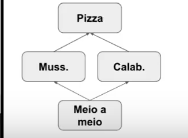
- A Pizza já é herdada por associação (pois Mussarela e Calabresa herdam pizza), então não precisamos citar Pizza novamente. Podemos deixar somente:


In [49]:
class Pizza2:
    pedacos = 8

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

class Mussarela(Pizza2):
    ...
    
class Calabresa(Pizza2):
    ...
    
class QuatroQueijos(Pizza2):
    ...
    
class FrangoComRequeijao(Pizza2):
    ...

# Com o conceito de herança, (todas as pizzas acima herdam as características de 
# Pizza), também podemos ter heranças múltiplas, ou seja, podemos construir pizzas 
# de múltiplos sabores    
class MeioAMeio(Mussarela, Calabresa):
    ...
    
m = MeioAMeio()

print(isinstance(m, Pizza2))
print(isinstance(m, Mussarela))
print(isinstance(m, Calabresa))

True
True
True


# Polimorfismo
- A condição de herdar algo e mudar o comportamento desse algo

- Vamos pensar que temos um método que mostre quais são os ingredientes de uma pizza
- Vamos pensar que:
    - Todas as pizzas tem ingredientes
    - Todas as pizzas tem ingredientes diferentes (se não seriam a mesma pizza)
- Porém, o método ingredientes deve mudar em todas as pizzas